#### Predict marks depending on number of hours studied

In [3]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


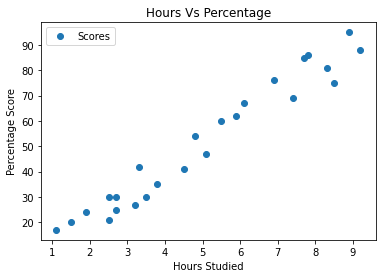

In [10]:
#PLotting the distribution of scores
df.plot(x="Hours",y="Scores",style ='o')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [18]:
x = df.iloc[:,:-1].values ## This gives 2d array for linear regression 
#x = df.iloc[:,0].values  // This is not used beacuse it give 1D array
y = df.iloc[:,1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [22]:
# Split it into train or test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [24]:
#Train our algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print("Training Compelete")

Training Compelete


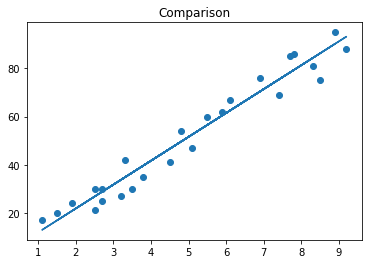

In [25]:
#Plotting the regression line
line = reg.coef_*x + reg.intercept_
#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line);
plt.title("Comparison")
plt.show()

In [26]:
print(x_test)
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
# Comparing Actual Vs Predicted
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [31]:
pred_hrs = np.array([8])
print(pred_hrs.shape)
pred_hrs = pred_hrs.reshape(-1,1)
print(pred_hrs)
predict = reg.predict(pred_hrs)
print("No of hours={}".format(8))
print("Predicted Score={}".format(predict[0]))

(1,)
[[8]]
No of hours=8
Predicted Score=81.30341188657256


In [32]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

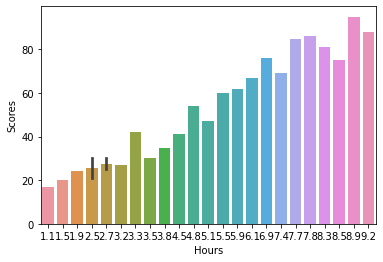

In [35]:
import seaborn as sns
sns.barplot(y="Scores",x="Hours",data=df)